<a href="https://colab.research.google.com/github/Otavioazeved/Projeto-Serie-A-2009/blob/main/Serie_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df['vencedor'] = df['vencedor'].replace('-', 'Empate')
df
df.rename(columns={'rodata': 'rodada'}, inplace=True)
df
df.to_csv('brasileirao_2009Filtrado2.csv')
df.head()
df.rename(columns={'arena':'estádio'},inplace=True)
df.head()


,Unnamed: 0.1,Unnamed: 0,ID,rodada,data,hora,mandante,visitante,vencedor,estádio,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,pontos_mandante,pontos_visitante
0,0,0,2707,1,2009-05-09,18:30,Sport,Barueri,Empate,Ilha do Retiro,1,1,PE,SP,1,1
1,1,1,2708,1,2009-05-09,18:30,Palmeiras,Coritiba,Palmeiras,Palestra Itália,2,1,SP,PR,3,0
2,2,2,2709,1,2009-05-09,18:30,Avai,Atletico-MG,Empate,Ressacada,2,2,SC,MG,1,1
3,3,3,2710,1,2009-05-10,16:00,Corinthians,Internacional,Internacional,Pacaembu,0,1,SP,RS,0,3
4,4,4,2711,1,2009-05-10,16:00,Fluminense,Sao Paulo,Fluminense,Maracanã,1,0,RJ,SP,3,0


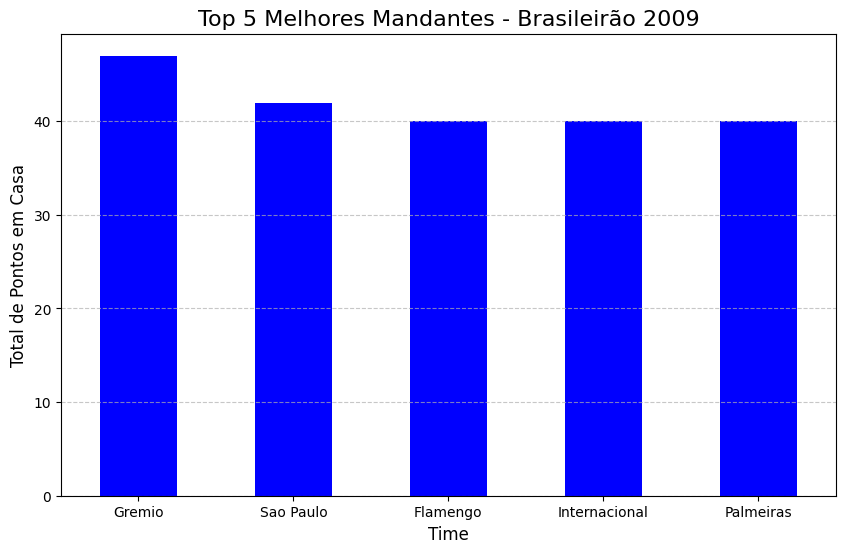

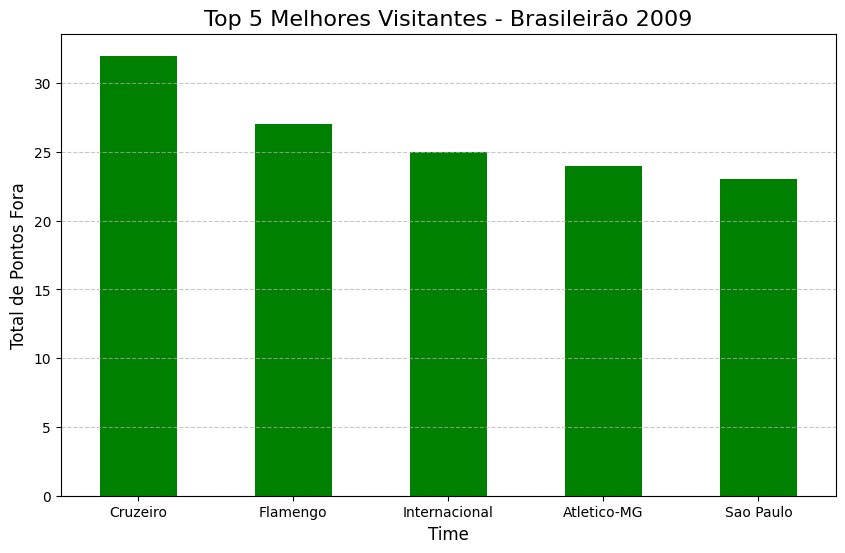

,Unnamed: 0,ID,rodada,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,pontos_mandante,pontos_visitante
0,0,2707,1,2009-05-09,18:30,Sport,Barueri,Empate,Ilha do Retiro,1,1,PE,SP,1,1
1,1,2708,1,2009-05-09,18:30,Palmeiras,Coritiba,Palmeiras,Palestra Itália,2,1,SP,PR,3,0
2,2,2709,1,2009-05-09,18:30,Avai,Atletico-MG,Empate,Ressacada,2,2,SC,MG,1,1
3,3,2710,1,2009-05-10,16:00,Corinthians,Internacional,Internacional,Pacaembu,0,1,SP,RS,0,3
4,4,2711,1,2009-05-10,16:00,Fluminense,Sao Paulo,Fluminense,Maracanã,1,0,RJ,SP,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,3082,38,2009-12-06,17:00,Internacional,Santo Andre,Internacional,Beira Rio,4,1,RS,SP,3,0
376,376,3083,38,2009-12-06,17:00,Santos,Cruzeiro,Cruzeiro,Vila Belmiro,1,2,SP,MG,0,3
377,377,3084,38,2009-12-06,17:00,Barueri,Athletico-PR,Empate,Prudentão,0,0,SP,PR,1,1
378,378,3085,38,2009-12-06,17:00,Vitoria,Goias,Empate,Barradão,2,2,BA,GO,1,1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('brasileirao_2009Filtrado2.csv')
condicoes_mandante = [
    (df['vencedor'] == df['mandante']),
    (df['vencedor'] == 'Empate')
]
escolhas_mandante = [3, 1]
df['pontos_mandante'] = np.select(condicoes_mandante, escolhas_mandante, default=0)

condicoes_visitante = [
    (df['vencedor'] == df['visitante']),
    (df['vencedor'] == 'Empate')
]
escolhas_visitante = [3, 1]
df['pontos_visitante'] = np.select(condicoes_visitante, escolhas_visitante, default=0)

df.to_csv('brasileirao_2009Filtrado3.csv', index=False)


pontos_em_casa = df.groupby('mandante')['pontos_mandante'].sum().sort_values(ascending=False)


pontos_fora = df.groupby('visitante')['pontos_visitante'].sum().sort_values(ascending=False)

top_5_mandantes = pontos_em_casa.head(5)


plt.figure(figsize=(10, 6))
top_5_mandantes.plot(kind='bar', color='blue')
plt.title('Top 5 Melhores Mandantes - Brasileirão 2009', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total de Pontos em Casa', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('grafico_top_5_mandantes.png', bbox_inches='tight')
plt.show()


top_5_visitantes = pontos_fora.head(5)


plt.figure(figsize=(10, 6))
top_5_visitantes.plot(kind='bar', color='green')
plt.title('Top 5 Melhores Visitantes - Brasileirão 2009', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total de Pontos Fora', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig('grafico_top_5_visitantes.png', bbox_inches='tight')
plt.show()
df.head()
df.to_csv('brasileirao_2009_pronto.csv')
df



